## 1. Introduction

This notebook covers Milestone 1 for the Sales Forecasting and Optimization project. The objectives are:
1.  **Data Collection:** Load the historical sales data.
2.  **Data Exploration:** Understand the data structure, identify patterns, trends, seasonality, and potential issues.
3.  **Data Preprocessing:** Clean the data by handling missing values, duplicates, and inconsistencies. Engineer basic time-based features.

The dataset used is `retail_store_inventory.csv`.

## 2. Setup and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

## 3. Data Collection

In [2]:
df = pd.read_csv('retail_store_inventory.csv')
df.head(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


## 4. Initial Data Exploration

In [3]:
df.shape

(73100, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

#### Observations:
*   The dataset has a size of `(73100, 15)`.
*   The `Date` column is currently an object (string) type and needs conversion to datetime.
*   `Holiday/Promotion` looks like a numerical indicator (likely 0 or 1).
*   Most other columns have appropriate data types (numerical or object for categorical).
*   It seems there are no missing values in the dataset.

In [5]:
df.describe()

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


#### Observations:

1. **Inventory Level**: 
   - The average inventory level is approximately 274.47 units, with a standard deviation of about 129.95 units. This indicates a moderate level of variability in inventory levels across the dataset.
   - The minimum inventory level is 50 units, while the maximum is 500 units, suggesting a wide range of inventory levels.

2. **Units Sold**:
   - The mean number of units sold is around 136.46, with a standard deviation of 108.92. This high standard deviation suggests significant variability in the number of units sold.
   - The median (50th percentile) is 107 units, which is lower than the mean, indicating a right-skewed distribution where some higher values are pulling the mean up.

3. **Demand Forecast**:
   - The mean demand forecast is approximately 141.49, with a standard deviation of 109.25. The negative minimum value (-9.99) suggests there might be some data entry errors or anomalies in the demand forecast data.
   - The 75th percentile is 208.05, indicating that 25% of the forecasts are above this value, which is significantly higher than the mean, suggesting some high demand forecasts.

4. **Price and Discount**:
   - The average price is 55.14, with a standard deviation of 26.02, indicating a wide range of pricing in the dataset. The prices range from 10 to 100.
   - The average discount is 10.01, with a standard deviation of 7.08. The discount ranges from 0 to 20, suggesting that discounts are applied variably across the dataset.

5. **Holiday/Promotion and Competitor Pricing**:
   - The Holiday/Promotion column is binary, with a mean of 0.497, indicating that approximately half of the entries involve a holiday or promotion.
   - Competitor pricing has a mean of 55.15 and a standard deviation of 26.19, with prices ranging from 5.03 to 104.94. This suggests that competitor pricing is quite variable and can be significantly lower or higher than the average price in the dataset.

## 5. Data Preprocessing
### 5.1. Handle Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

### 5.2. Convert Data Types

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                73100 non-null  datetime64[ns]
 1   Store ID            73100 non-null  object        
 2   Product ID          73100 non-null  object        
 3   Category            73100 non-null  object        
 4   Region              73100 non-null  object        
 5   Inventory Level     73100 non-null  int64         
 6   Units Sold          73100 non-null  int64         
 7   Units Ordered       73100 non-null  int64         
 8   Demand Forecast     73100 non-null  float64       
 9   Price               73100 non-null  float64       
 10  Discount            73100 non-null  int64         
 11  Weather Condition   73100 non-null  object        
 12  Holiday/Promotion   73100 non-null  int64         
 13  Competitor Pricing  73100 non-null  float64   

#### Observations:
*   The `Date` column is now of `datetime64[ns]` type, which is essential for time-series analysis.

### 5.3. Address Inconsistencies

In [8]:
print(f"Negative Units Sold count: {(df['Units Sold'] < 0).sum()}")
print(f"Negative Price count: {(df['Price'] < 0).sum()}")
print(f"Number of rows with negative Demand Forecast: {(df['Demand Forecast'] < 0).sum()}")

Negative Units Sold count: 0
Negative Price count: 0
Number of rows with negative Demand Forecast: 673


In [9]:
df.loc[df['Demand Forecast'] < 0, 'Demand Forecast'] = 0
print(f"Number of rows with negative Demand Forecast: {(df['Demand Forecast'] < 0).sum()}")

Number of rows with negative Demand Forecast: 0


## 6. Exploratory Data Analysis (EDA)
### 6.1. Univariate Analysis

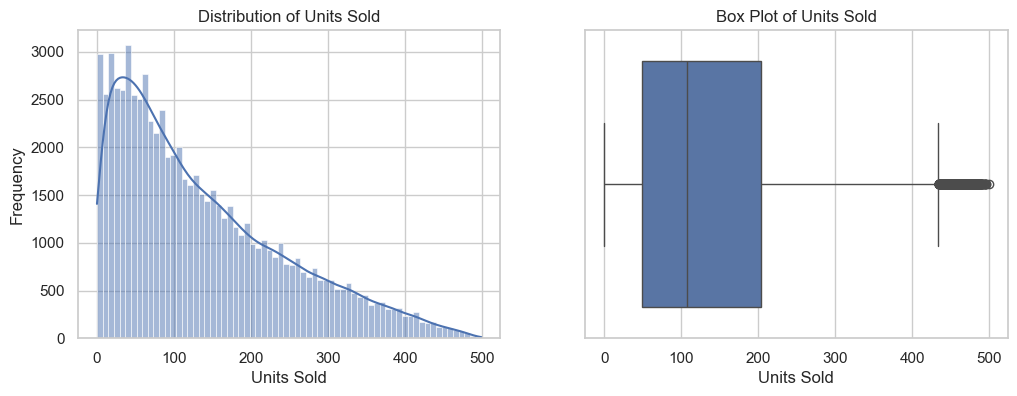

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of the target variable: Units Sold
sns.histplot(df['Units Sold'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Units Sold')
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('Frequency')

# Box Plot of Units Sold
sns.boxplot(x=df['Units Sold'], ax=axes[1])
axes[1].set_title('Box Plot of Units Sold')
axes[1].set_xlabel('Units Sold')

# Display the plots
plt.show()

#### Observations:

1. **Distribution of Units Sold (Histogram with KDE)**:
   - The histogram shows a right-skewed distribution, indicating that lower values of units sold are more common, while higher values are less frequent.
   - The kernel density estimate (KDE) line further emphasizes the skewness, with a peak at the lower end and a long tail extending towards higher values.
   - Most of the data points are concentrated between 0 and 200 units sold, with a gradual decrease in frequency as the number of units sold increases.

2. **Box Plot of Units Sold**:
   - The box plot confirms the right-skewed nature of the data, with the median closer to the lower quartile.
   - The interquartile range (IQR), represented by the box, shows that the middle 50% of the data is between approximately 50 and 200 units sold.
   - There are several outliers on the higher end, as indicated by the points beyond the whiskers. These outliers represent instances where a significantly higher number of units were sold compared to the majority of the data.

Overall, these graphs suggest that while most sales are relatively low, there are occasional instances of high sales, which are considered outliers in the dataset. The right-skewed distribution is typical in sales data, where a few high sales can significantly impact the overall distribution.

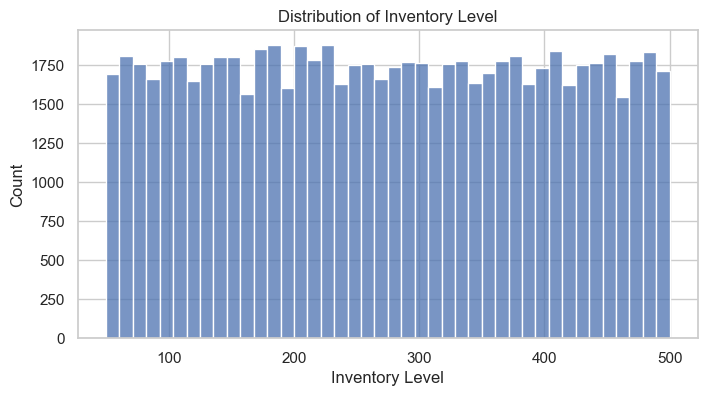

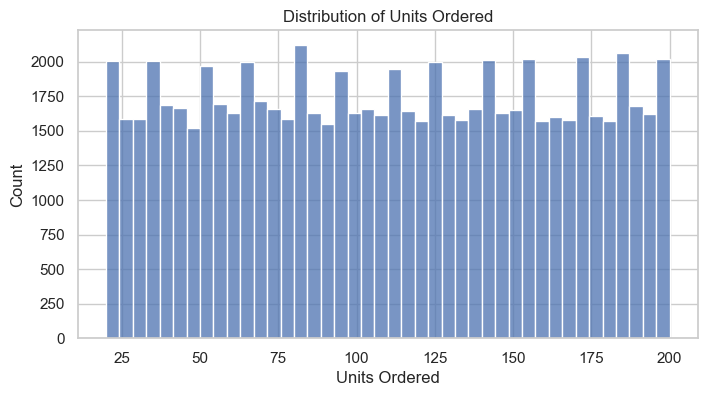

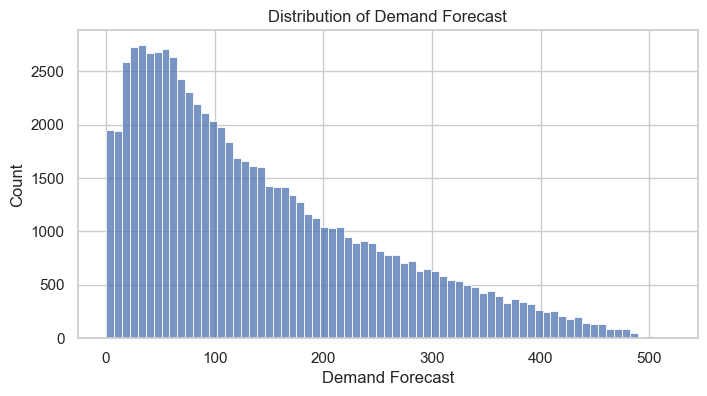

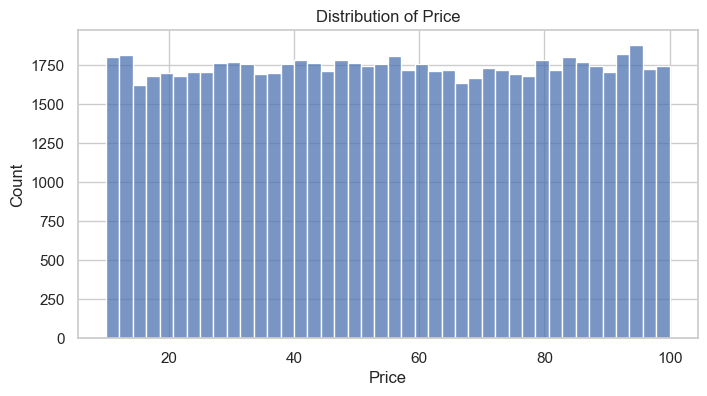

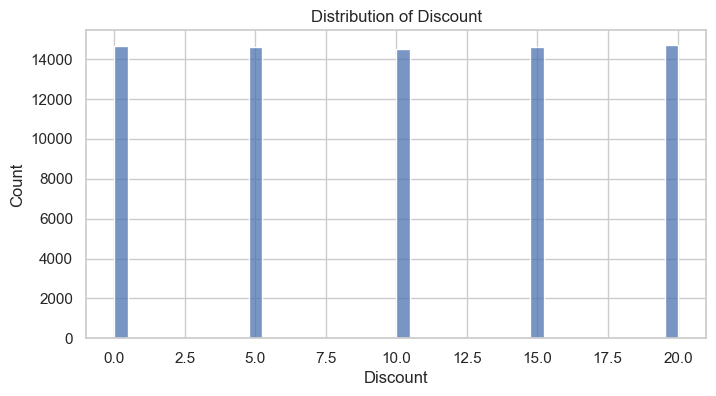

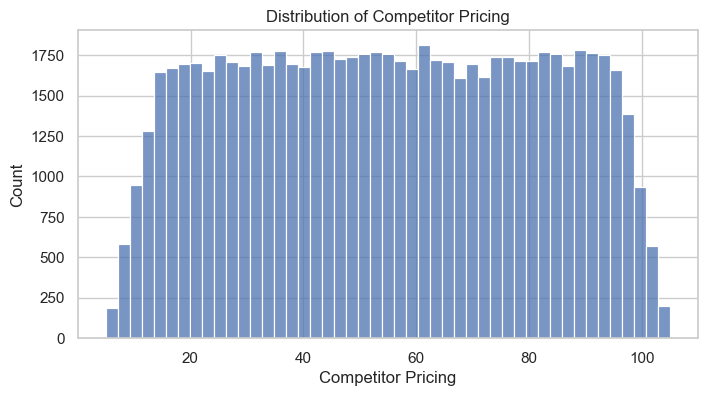

In [11]:
# Distribution of other key numerical features
numerical_features = ['Inventory Level', 'Units Ordered', 'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing']
for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Observations:

1. **Distribution of Inventory Level**:
   - The distribution appears to be relatively uniform across the range from 50 to 500. This suggests that inventory levels are evenly distributed across this range, with no particular concentration at any specific level.

2. **Distribution of Units Ordered**:
   - Similar to the inventory level, the distribution of units ordered is fairly uniform across the range from 20 to 200. This indicates that orders are spread evenly across this range, without any significant peaks or troughs.

3. **Distribution of Demand Forecast**:
   - The demand forecast shows a right-skewed distribution, with a higher concentration of values at the lower end of the range. This suggests that lower demand forecasts are more common, while higher forecasts are less frequent.

4. **Distribution of Price**:
   - The price distribution is quite uniform across the range from 10 to 100. This indicates that prices are evenly distributed, with no particular price point being more common than others.

5. **Distribution of Discount**:
   - The discount distribution shows distinct peaks at specific intervals (0, 5, 10, 15, and 20). This suggests that discounts are applied in fixed increments, likely due to a pricing strategy or policy.

6. **Distribution of Competitor Pricing**:
   - The competitor pricing distribution is relatively uniform across the range from 5 to 105, similar to the price distribution. This suggests that competitor prices are spread evenly across this range, with no particular concentration at any specific price point.

Overall, the graphs provide insights into the distribution and variability of each variable, highlighting uniform distributions for some variables and skewed or discrete distributions for others.

### 6.2. Bivariate Analysis

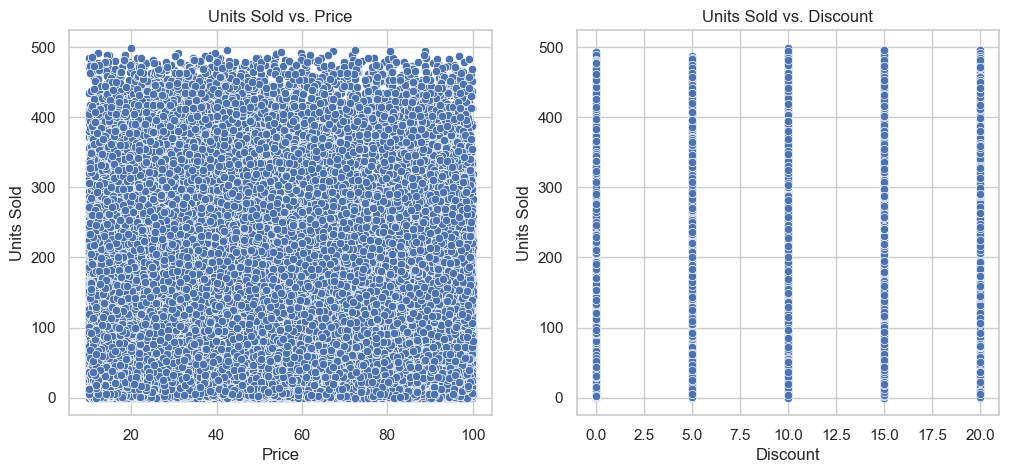

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Units Sold vs. Price
sns.scatterplot(x=df['Price'], y=df['Units Sold'], ax=axes[0])
axes[0].set_title('Units Sold vs. Price')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Units Sold')

# Scatter plot: Units Sold vs. Discount
sns.scatterplot(x=df['Discount'], y=df['Units Sold'], ax=axes[1])
axes[1].set_title('Units Sold vs. Discount')
axes[1].set_xlabel('Discount')
axes[1].set_ylabel('Units Sold')

# Display the plots
plt.show()

#### Observations:

1. **Units Sold vs. Price**:
   - The scatter plot shows a very dense and uniform distribution of points across the entire range of prices (10 to 100) and units sold (0 to 500).
   - There does not appear to be a clear pattern or trend between price and units sold, suggesting that price may not have a strong linear relationship with the number of units sold in this dataset.
   - The uniform distribution of points indicates that units sold are spread across all price levels without any noticeable clustering or correlation.

2. **Units Sold vs. Discount**:
   - The scatter plot shows distinct vertical lines at specific discount values (0, 5, 10, 15, and 20), indicating that discounts are applied in fixed increments.
   - Similar to the price plot, there is no clear pattern or trend between discount and units sold, suggesting that discount levels may not have a strong linear relationship with the number of units sold.
   - The vertical alignment of points at each discount level suggests that units sold are distributed across these fixed discount values without any noticeable clustering or correlation.

Overall, these scatter plots suggest that neither price nor discount shows a strong linear relationship with units sold. The data points are evenly distributed across the ranges of both variables, indicating that other factors might be influencing sales more significantly.

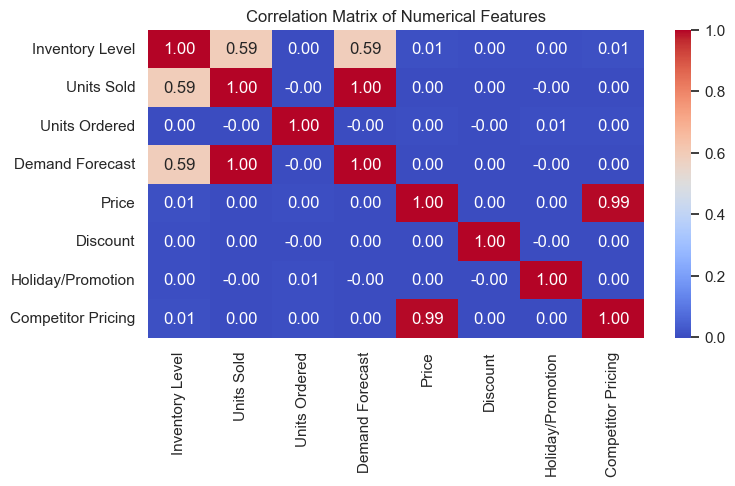

In [13]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(8, 4))
numerical_df = df.select_dtypes(include=np.number) # Select only numerical columns for correlation
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Observations:

1. **Inventory Level**:
   - Inventory Level has a moderate positive correlation with Units Sold (0.59) and Demand Forecast (0.59). This suggests that higher inventory levels are associated with higher sales and demand forecasts.

2. **Units Sold**:
   - Units Sold has a perfect positive correlation with Demand Forecast (1.00), indicating that these two variables move together perfectly. This could suggest that the demand forecast is directly based on the units sold or vice versa.

3. **Units Ordered**:
   - Units Ordered shows no significant correlation with any other variables, indicating that it operates independently of the other features in this dataset.

4. **Price and Competitor Pricing**:
   - Price and Competitor Pricing have a very high positive correlation (0.99), suggesting that these two variables are closely related, possibly due to competitive pricing strategies.

5. **Discount and Holiday/Promotion**:
   - Both Discount and Holiday/Promotion show no significant correlation with any other variables, indicating that these factors do not have a strong linear relationship with the other features in this dataset.

Overall, the heatmap reveals that while some variables, like Price and Competitor Pricing, are highly correlated, others, such as Units Ordered and Discount, show little to no correlation with the rest of the features.

### 6.3. Time Series Analysis

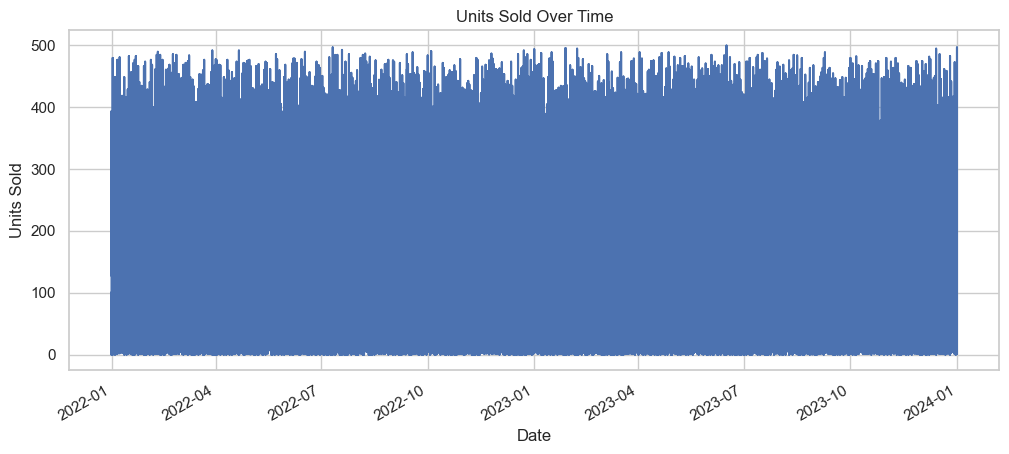

In [14]:
# Set Date as index for time series plotting
df_time = df.set_index('Date')

# Plot Units Sold over time
plt.figure(figsize=(12, 5))
df_time['Units Sold'].plot()
plt.title('Units Sold Over Time')
plt.ylabel('Units Sold')
plt.xlabel('Date')
plt.show()

#### Observations:

1. **Consistency in Sales**:
   - The graph shows a relatively consistent level of units sold over the entire time period from early 2022 to early 2024. The sales appear to fluctuate within a narrow range, indicating stable demand.

2. **Lack of Seasonal Trends**:
   - There are no obvious seasonal patterns or significant peaks and troughs in the data. This suggests that the units sold do not vary significantly with seasons or specific time periods.

3. **High Sales Volume**:
   - The units sold consistently reach high values, often close to the maximum of 500 units. This indicates a strong and steady sales performance throughout the observed period.

4. **Minor Fluctuations**:
   - While the overall trend is stable, there are minor fluctuations in the number of units sold. These fluctuations do not appear to follow any specific pattern and could be due to random variations or short-term factors.

Overall, the graph suggests a stable sales environment with consistent demand over the observed time period, without significant seasonal or temporal variations.

## 7. Feature Engineering (Basic Time Features)

In [15]:
df = df_time.reset_index()

# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype(int)

df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,DayOfWeek,WeekOfYear
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,2022,1,1,5,52
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,2022,1,1,5,52
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,2022,1,1,5,52
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,2022,1,1,5,52
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,2022,1,1,5,52


In [16]:
# Save the cleaned dataset
df.to_csv(r'cleaned_retail_data_milestone1.csv', index=False)

## 8. Milestone 1 Summary

This notebook performed the initial steps of the sales forecasting project:
1.  **Loaded** the `retail_store_inventory.csv` data.
2.  **Explored** the data, checked types, statistics, and missing values.
3.  **Preprocessed** the data by converting the `Date` column and checking for duplicates/inconsistencies.
4.  **Visualized** key distributions, relationships, and time series patterns using EDA.
5.  **Engineered** basic time-based features (`Year`, `Month`, `Day`, `DayOfWeek`, `WeekOfYear`).

### Deliverables:
*   **EDA Report:** The markdown cells and observations throughout this notebook serve as the Data Exploration Report summary.
*   **EDA Notebook.**
*   **Cleaned Dataset:** The final state of the `df` DataFrame is the cleaned dataset.